# 1D Regression Analysis

## Introduction

In this notebook we will learn how to apply a regression on simplified, synthetic data. 
The regression is to learn/find a relationship between a dependend and an independend variable. The result is a regression model. Afterwards, this model can be used to predict new continuous numerical data.


## Table of Contents
- [Linear Regression](#Linear_Regression)
- [Split in Train and Test data](#Split)
- [Extrapolation](#Extrapolation)
- [Polynomial Regression](#Polynomial_Regression)



### Learning a model, how?



In short:
Minimizing an error function, e.g. RMS (root-mean-square) error, or in other words least-square-fit, between the forward prediction of the model and the dependent variable of the data. The model with the lowest misfit is defined as best model. Find out more: [Wiki](https://en.wikipedia.org/wiki/Least_squares) and/or [More](https://www.mathsisfun.com/data/least-squares-regression.html) 

<a id='Linear_Regression'></a> 
# Linear Regression

Linear model:

x * m + n = y 

Learning the parameters m and n.

In [2]:
# Load packages
import numpy as num
import matplotlib.pyplot as plt

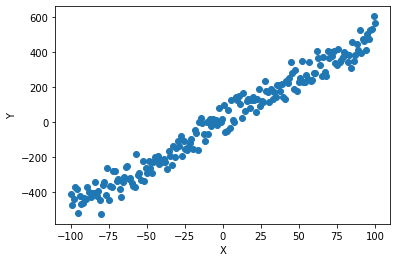

In [14]:
# Creating data
xdata = num.linspace(-100, 100, 200)

# Setting random seed to create same noise
num.random.seed(0)

# Adding noise to data 
noise = num.random.normal(0, 50, len(xdata))
#print(noise)

# x-y-Function
ydata = 5 * xdata + noise

# Plotting data
plt.figure()
plt.scatter(xdata, ydata)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# Importing Linear Regression Model from scikit-learn
from sklearn.linear_model import LinearRegression

# Setting the model
model = LinearRegression()

In [16]:
# Reshaping xdata to fit into model requirements 
xdata = xdata.reshape((-1, 1))

# Fitting the model to the data (or vice-versa?)
model.fit(xdata, ydata)

# Retrieving the quality score and coeffients
r_sq = model.score(xdata, ydata)
print('Train-R² :', r_sq)
print('Intercept:', model.intercept_)
print('Slope    :', model.coef_)

Train-R² : 0.969475234526012
Intercept: 3.545524657058062
Slope    : [4.95330109]


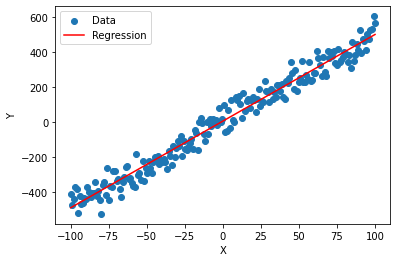

In [17]:
# Creating a regression line and plotting it
yregr = model.coef_ * xdata + model.intercept_
#yregr = model.predict(xtrain)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, yregr, color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Tasks
- different functions
- different data densities

<a id='Split'></a> 
# Split in train and test datasets

Good practise in the machine learning community is to split the data into at least a training and a test set. The idea is that the model is learned with the help of the training data, while the test data is afterwards use to check how good the learned model performs with 'new', unseen data. If the score/fit of the test data is sufficient one speaks that the model generalized the problem sufficient enough.

There are two ways of splitting the data:
- randomly select data points
- with a specific scheme: e.g. last/first points or points with a specific charateristic 

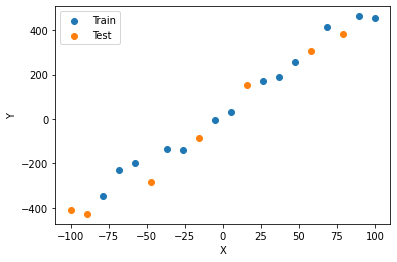

In [9]:
# Creating data
xdata = num.linspace(-100, 100, 20)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))

# x-y-Function
ydata = 5 * xdata + noise

# Split data randomly into train and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42)

# Reshaping
xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))

#ytest += 100

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Train-Intercept: 36.68107645398289
Train-Slope    : [4.59155479]
Train-R²       : 0.9842614248254904
Test-R²        : 0.9733127833754165


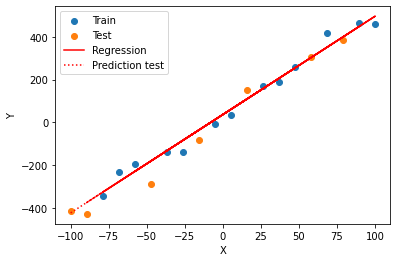

In [10]:
from sklearn.linear_model import LinearRegression

# Fitting
model = LinearRegression()
model.fit(xtrain, ytrain)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)

# Predicting train data
yregr = model.predict(xtrain)
train_rsq = model.score(xtrain, ytrain)
print('Train-R²       :', train_rsq)

# Predicting test data
ypred = model.predict(xtest)
test_rsq = model.score(xtest, ytest)
print('Test-R²        :', test_rsq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<a id='Extrapolation'></a> 
# Extrapolation
Extrapolation is the term when predicting values that are outside of the training set range. Usually, this is not a good idea as the model wasn't trained for those range. But there are cases where extrapolation is the main goal of the model. For example, predicting future data in weather forecast.

If we now change the split method to first/last, we simulate this extrapolation.

Train-Intercept: -5.632846303649586
Train-Slope    : [4.19185391]
Train-R²       : 0.9022069337627145
Test-R²        : 0.7086121241442066


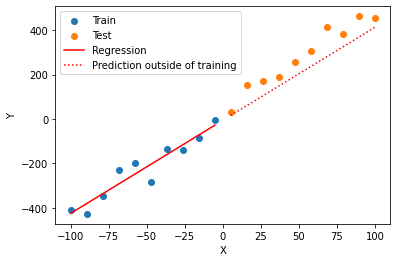

In [12]:
# Creating data
xdata = num.linspace(-100, 100, 20)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
ydata = 5 * xdata + noise
# ydata = 5 * xdata ** 2 + noise

## Splitting by indices
## Selecting the first data as training and the last as testing
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]

xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))


# Fitting and plotting
model = LinearRegression()
model.fit(xtrain, ytrain)

# Predicting
yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

# Plotting
plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<a id='Polynomial_Regression'></a> 
# Polynominal Regression
or Multi Linear Regression.

Now the linear formula:

x * m + n = y 

is expanded to include higher order terms, e.g. 3rd order

a * x^3 + b * x^2 + c * x + d = y

All the parameters a, b, c, d, ... will be trained.


#### First we look at an example:

Train-Intercept: -397.8994497537949
Train-Slope    : [49.4499152]
Train-R²       : 0.9190163233656129
Test-R²        : -0.8115857074983615


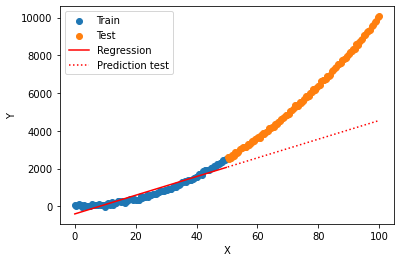

In [13]:
# Creating data
xdata = num.linspace(0, 100, 200)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
ydata = xdata**2 + noise

## Splitting randomly
# xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42)

## Splitting by indices
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]

# Reshaping
xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))


# Fitting and plotting
model = LinearRegression()
model.fit(xtrain, ytrain)

# Predicting
yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

# Plotting
plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Additional parameters are needed: e.g. Polynomial regression

Train-R²       : 0.9961900765333604
Test-R²        : 0.9813107385693104


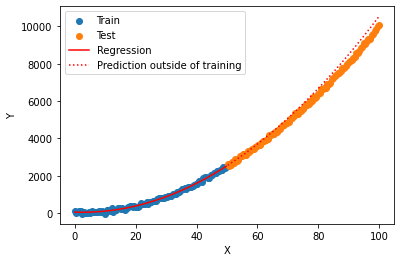

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Combining a the linear model with a polynomial features selector in sklearn
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

# Fitting
model.fit(xtrain, ytrain)

# Predicting
yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

# Plotting
plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### With numpy polynomial

Slight changes in syntax, e.g. no reshaping needed.

Coeffs: [ 1.10464907 -5.50498832 53.15419727]
[213301.19980006]


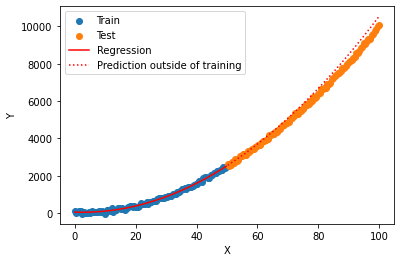

In [14]:
# Creating data
xdata = num.linspace(0, 100, 200)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
ydata = xdata**2 + noise
#ydata = xdata * 1 + noise
#ydata = num.sin(xdata * 2 * num.pi * 0.01) + xdata * 0.01


## Splitting randomly
# xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42, shuffle=True)

## Splitting by indices
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]


# Fitting
order = 2
coeff, residuals, rank, singular_values, rcond = num.polyfit(xtrain, ytrain, order, full=True)
print('Coeffs:', coeff)
print(residuals)

model = num.poly1d(coeff)
yregr = model(xtrain)
ypred = model(xtest)

# Plotting
plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Tasks
- different number in datasets
- different orders
- different functions
- overfitting
- underfitting
- prediction outside of learning space


# Summary

We have learned the basic ideas behind regression for linear data and polynominal data.
The leared model can be used for prediction of new data or simply representing the relaionship between the variables.
Further, we know now that it is better to split the data before training in at least a training and a testing set.
Extrapolation should be avoid, unless the goal of our model is to predict future or extrem data.